# This notebook compares the results from the Oneill (2021) supplement with PySulfSat

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySulfSat as ss
import Thermobar as pt
pd.options.display.max_columns = None

## Test 1 - Calculating ONeill SCSS using a fixed FeFeCuNi ratio

In [2]:
Liqs=pd.read_excel('Clean_Oneill_SCSSCalc_July2020_Fixed_Sulfide.xlsx', sheet_name="Python_Input")

In [3]:
Sulf_Sat1=ss.calculate_O2021_SCSS(df=Liqs, T_K=Liqs['T_K'],
P_kbar=Liqs['P_kbar'], Fe_FeNiCu_Sulf=Liqs['Fe_FeNiCu_Sulf'],
Fe3Fet_Liq=1-Liqs['Fe2FeT_Liq'])

Using inputted Fe_FeNiCu_Sulf ratio for calculations.


Text(0, 0.5, 'Discprenecy (Python - Excel, ppm)')

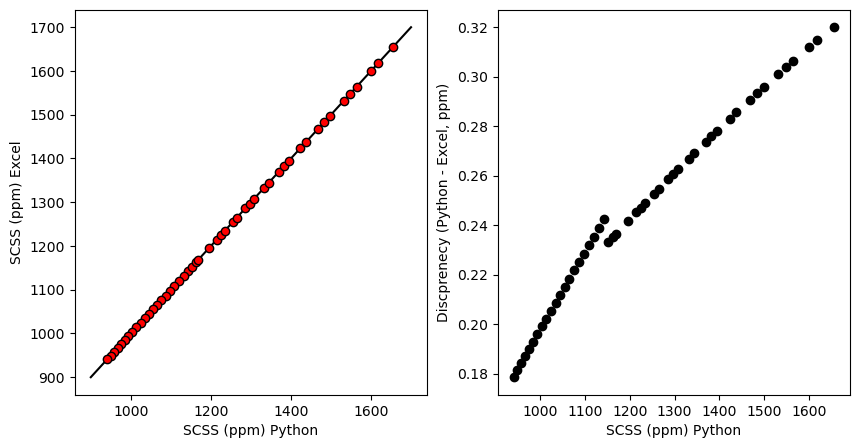

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([900, 1700], [900, 1700], '-k')
ax1.plot(Sulf_Sat1['SCSS2_ppm'], Liqs['SCSS_Calc'], 'ok', mfc='red')
ax1.set_xlabel('SCSS (ppm) Python')
ax1.set_ylabel('SCSS (ppm) Excel')

ax2.plot(Sulf_Sat1['SCSS2_ppm'], Sulf_Sat1['SCSS2_ppm']-Liqs['SCSS_Calc'], 'ok')
ax2.set_xlabel('SCSS (ppm) Python')
ax2.set_ylabel('Discprenecy (Python - Excel, ppm)')

## Test 2 - Calculating using the full O'Neill set up (O'Neill Fe3, and sulfide composition)

In [8]:
Liqs2=pd.read_excel('Clean_Oneill_SCSSCalc_July2020_Calc_Sulf.xlsx', sheet_name="Python_Input")
Liqs_2=Liqs2.iloc[0:49]

In [9]:
Sulf_Sat2=ss.calculate_O2021_SCSS(df=Liqs2, T_K=Liqs2['T_K'],
P_kbar=Liqs2['P_kbar'], 
Ni_Liq=Liqs2['Ni(ppm)'],  Cu_Liq=Liqs2['Cu(ppm)'],
Fe_FeNiCu_Sulf="Calc_ONeill", Fe3Fet_Liq="Calc_ONeill")

Text(0, 0.5, 'Discprenecy (Python - Excel, ppm)')

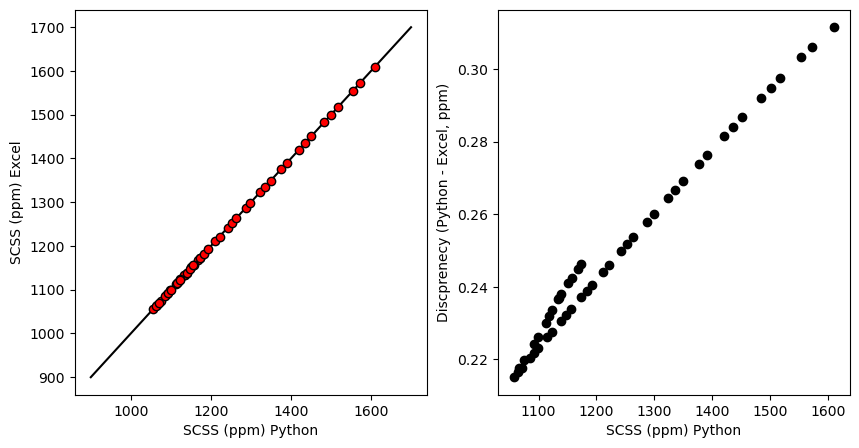

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([900, 1700], [900, 1700], '-k')
ax1.plot(Sulf_Sat2['SCSS2_ppm'], Liqs_2['SCSS_Calc'], 'ok', mfc='red')
ax1.set_xlabel('SCSS (ppm) Python')
ax1.set_ylabel('SCSS (ppm) Excel')

ax2.plot(Sulf_Sat2['SCSS2_ppm'], Sulf_Sat2['SCSS2_ppm']-Liqs2['SCSS_Calc'], 'ok')
ax2.set_xlabel('SCSS (ppm) Python')
ax2.set_ylabel('Discprenecy (Python - Excel, ppm)')

## Using specified Fe3Fet ratio

In [11]:
Sulf_Sat3=ss.calculate_O2021_SCSS(df=Liqs2, T_K=Liqs2['T_K'],
P_kbar=Liqs2['P_kbar'], 
  Ni_Liq=Liqs2['Ni(ppm)'],  Cu_Liq=Liqs2['Cu(ppm)'],
Fe_FeNiCu_Sulf="Calc_ONeill", 
Fe3Fet_Liq=0.5)
Sulf_Sat3.head()

,SCSS2_ppm,LnS,Ln_a_FeO,Ln_a_FeS,DeltaG,LnCS2_calc,Sample_ID,Na2O_Liq,MgO_Liq,Al2O3_Liq,SiO2_Liq,K2O_Liq,CaO_Liq,TiO2_Liq,MnO_Liq,FeOt_Liq,Ni(ppm),Cu(ppm),SCSS_Calc,Fe_FeNiCu_Sulf,Fe2FeT_Liq,T_K,P_kbar,P2O5_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_Fe3,Mg_Number_Liq_NoFe3,Fe2_Liq_cat_frac,Fe_FeNiCu_Sulf_calc
0,1571.264417,7.359636,-3.069301,-0.821966,7.168095,-2.055794,liq1,1.6942,10.8271,13.7783,49.8629,0.0714,13.6948,0.8165,0.1633,8.234950,204.1,91.9,1172.715605,0.607567,0.930773,1550.625,3.2,0,0.508165,0.164493,0.001410,0.070185,0.149539,0.082747,0.016738,0.000464,0.006259,0.0,0.461990,0.149546,0.001282,0.063807,0.135951,0.150455,0.030435,0.000844,0.005690,0.0,0.700924,0.700924,0.031904,0.454053
1,1566.109924,7.356350,-3.060618,-0.816116,7.186522,-2.074673,liq2,1.7097,10.7535,13.8855,49.8268,0.0722,13.6168,0.8220,0.1649,8.284297,200.8,92.6,1167.706834,0.610090,0.930283,1547.681,3.2,0,0.508335,0.163548,0.001425,0.070680,0.148845,0.083479,0.016909,0.000470,0.006308,0.0,0.461763,0.148564,0.001294,0.064205,0.135209,0.151661,0.030720,0.000854,0.005730,0.0,0.698235,0.698235,0.032102,0.456810
2,1554.254703,7.348751,-3.042926,-0.804985,7.224528,-2.113718,liq3,1.7415,10.5983,14.1061,49.7524,0.0736,13.4610,0.8332,0.1683,8.384692,194.4,94.1,1156.836321,0.614885,0.929200,1541.646,3.2,0,0.508696,0.161543,0.001458,0.071695,0.147467,0.084992,0.017262,0.000480,0.006408,0.0,0.461304,0.146493,0.001322,0.065015,0.133728,0.154148,0.031307,0.000871,0.005811,0.0,0.692604,0.692604,0.032508,0.462117
3,1547.739816,7.344551,-3.033917,-0.799573,7.244129,-2.133922,liq4,1.7579,10.5167,14.2195,49.7141,0.0744,13.3834,0.8390,0.1701,8.435550,191.2,94.9,1151.074341,0.617212,0.928603,1538.553,3.2,0,0.508884,0.160482,0.001475,0.072212,0.146784,0.085773,0.017444,0.000486,0.006460,0.0,0.461070,0.145404,0.001336,0.065427,0.132992,0.155428,0.031610,0.000880,0.005853,0.0,0.689663,0.689663,0.032713,0.464724
4,1534.010169,7.335641,-3.015692,-0.788948,7.284175,-2.175279,liq5,1.7914,10.3467,14.4502,49.6360,0.0760,13.2303,0.8508,0.1737,8.538165,184.9,96.5,1139.204685,0.621775,0.927306,1532.274,3.2,0,0.509275,0.158258,0.001510,0.073262,0.145445,0.087369,0.017818,0.000497,0.006566,0.0,0.460597,0.143131,0.001365,0.066259,0.131543,0.158036,0.032230,0.000900,0.005939,0.0,0.683555,0.683555,0.033130,0.469890
